In [1]:
!pip install openai==0.28
!pip install langchain
!pip install langchain_community
!pip install langchain_experimental


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 37.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.7/626.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.0
    Uninstalling numpy-2.1.0:
      Successfully uninstalled numpy-2.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import openai # The openai package is now installed and can be imported
from langchain import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

Loading and Cleaning the data

In [3]:
leads_data= pd.read_csv('/workspaces/AI-Automated-Lead-Generation-System/Data/SMEs List.csv')
leads_data.head()

,Company,Company Name for Emails,Account Stage,Lists,# Employees,Industry,Account Owner,Website,Company Linkedin Url,Facebook Url,...,Number of Retail Locations,Apollo Account Id,SIC Codes,Short Description,Founded Year,Logo Url,Primary Intent Topic,Primary Intent Score,Secondary Intent Topic,Secondary Intent Score
0,GOI International UAE,GOI International UAE,Cold,NaN,10,graphic design,abdullahshami97@gmail.com,NaN,http://www.linkedin.com/company/goi-internatio...,NaN,...,NaN,66dbffc01be2b000011d3dad,NaN,Fire Detection & Suppression\nOilfield Equipme...,2009.0,https://zenprospect-production.s3.amazonaws.co...,NaN,NaN,NaN,NaN
1,SUNDANCE EVENTS,SUNDANCE EVENTS,Cold,NaN,14,events services,abdullahshami97@gmail.com,http://www.sundancehq.com,http://www.linkedin.com/company/sundance-events,https://facebook.com/SundanceCORP,...,NaN,66dbffc01be2b000011d3db3,NaN,SUNDANCE events is a fully integrated event ma...,2005.0,https://zenprospect-production.s3.amazonaws.co...,NaN,NaN,NaN,NaN
2,Techsource LLC,Techsource,Cold,NaN,13,information technology & services,abdullahshami97@gmail.com,http://www.techsource.ae,http://www.linkedin.com/company/techsource-llc,NaN,...,NaN,66dbffc01be2b000011d3dba,NaN,"Offering Hosted Services (IaaS, PaaS and SaaS)...",NaN,https://zenprospect-production.s3.amazonaws.co...,NaN,NaN,NaN,NaN
3,Cactix,Cactix,Cold,NaN,20,marketing & advertising,abdullahshami97@gmail.com,http://www.cactix.com,http://www.linkedin.com/company/cactix,http://www.facebook.com/cactix,...,NaN,66dbffc01be2b000011d3dbd,7374,Cactix is a B2B marketing agency specialized i...,2011.0,https://zenprospect-production.s3.amazonaws.co...,NaN,NaN,NaN,NaN
4,Kassab Trans Media,Kassab Trans Media,Cold,NaN,62,marketing & advertising,abdullahshami97@gmail.com,http://www.kassabmedia.com,http://www.linkedin.com/company/kassab-media-f...,https://facebook.com/pages/Kassab-Media/129036...,...,NaN,66dbffc01be2b000011d3dbf,7311,Kassab Trans Media is a leading media services...,NaN,https://zenprospect-production.s3.amazonaws.co...,NaN,NaN,NaN,NaN


In [4]:
leads_data.drop(columns=[
    'Company', 'Account Stage', 'Lists', 'Account Owner', 'Website',
    'Company Linkedin Url', 'Facebook Url', 'Twitter Url', 'Company Street',
    'Company State', 'Company Country', 'Company Postal Code', 'Company Address',
    'SEO Description', 'Total Funding', 'Latest Funding', 'Latest Funding Amount',
    'Last Raised At', 'Number of Retail Locations', 'Apollo Account Id', 'SIC Codes',
    'Logo Url', 'Primary Intent Topic', 'Primary Intent Score',
    'Secondary Intent Topic', 'Secondary Intent Score'
], inplace=True) #Removed the empty strings from the list


In [5]:
leads_data.head(100)

,Company Name for Emails,# Employees,Industry,Company City,Keywords,Company Phone,Technologies,Annual Revenue,Short Description,Founded Year
0,GOI International UAE,10,graphic design,Dubai,"oilfield drilling equipment, spares, fire dete...",'+971 4 420 7528,"Cloudflare DNS, CloudFlare Hosting, Google Tag...",1400000.0,Fire Detection & Suppression\nOilfield Equipme...,2009.0
1,SUNDANCE EVENTS,14,events services,Dubai,"corporate events, incentive trips & destinatio...",'+971 4 457 0336,"Amazon AWS, Mobile Friendly, Google AdSense",2236000.0,SUNDANCE events is a fully integrated event ma...,2005.0
2,Techsource,13,information technology & services,Dubai,NaN,'+971 4 812 2022,"Mimecast, Outlook, Microsoft Office 365, Micro...",4000000.0,"Offering Hosted Services (IaaS, PaaS and SaaS)...",NaN
3,Cactix,20,marketing & advertising,Dubai,"social media, web development, content, inboun...",'+971 4 871 6718,"Cloudflare DNS, Gmail, Google Apps, Amazon AWS...",2000000.0,Cactix is a B2B marketing agency specialized i...,2011.0
4,Kassab Trans Media,62,marketing & advertising,Dubai,"outdoor advertising, out of home, advertising,...",'+971 4 450 6700,"Gmail, Google Apps, GoDaddy Hosting, Apache",2523000.0,Kassab Trans Media is a leading media services...,NaN
...,...,...,...,...,...,...,...,...,...,...
95,iSAT Africa Ltd FZC,43,telecommunications,Dubai,NaN,'+971 4 369 5050,"Outlook, MailChimp SPF, Microsoft Office 365, ...",1000000.0,iSAT Africa is an integrated communications se...,2009.0
96,Sun & Energy Solar,37,semiconductors,Dubai,"solar energy products, solar panels, off grid ...",'+971 4 221 7518,"Hubspot, Woo Commerce, WordPress.org, Facebook...",4200000.0,Sunergy Solar LLC is a solar energy company ba...,2016.0
97,Techno Steel Construction Co. L.L.C,63,construction,Dubai,"steel structure, steel design, steel construct...",'+971 4 801 5400,"Remote, AI",1500000.0,Techno Steel Construction Co. L.L.C. has been ...,1992.0
98,Talent Arabia,40,staffing & recruiting,أبو ظبي,"recruitment, contract staffing, executive sear...",'+971 50 422 3904,"GoDaddy Hosting, Google Tag Manager, Apache, Y...",1000000.0,Welcome to our talent management solutions. We...,2016.0


In [6]:
# Handle other missing values
leads_data.fillna({
    '# Employees': leads_data['# Employees'].median(),
    'Annual Revenue': leads_data['Annual Revenue'].median() if 'Annual Revenue' in leads_data.columns else None, # Check if 'Annual Revenue' column exists before calculating median
    'Founded Year': leads_data['Founded Year'].mode()[0]  # Assuming mode is appropriate for the year
}, inplace=True)


In [7]:
# Categorize the number of employees into bins and add a 'Company Size' column
bins = [0, 50, 300, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Add the 'Company Size' column by categorizing '# Employees'
leads_data['Company Size'] = pd.cut(leads_data['# Employees'], bins=bins, labels=labels)

# Calculate Lead Age
leads_data['Lead_Age'] = 2024 - leads_data['Founded Year']  # Adjust year accordingly

# Calculate Revenue per Employee
leads_data['Revenue_Per_Employee'] = leads_data[' Annual Revenue '] / leads_data['# Employees']


# Display the updated DataFrame
leads_data.head()

,Company Name for Emails,# Employees,Industry,Company City,Keywords,Company Phone,Technologies,Annual Revenue,Short Description,Founded Year,Company Size,Lead_Age,Revenue_Per_Employee
0,GOI International UAE,10,graphic design,Dubai,"oilfield drilling equipment, spares, fire dete...",'+971 4 420 7528,"Cloudflare DNS, CloudFlare Hosting, Google Tag...",1400000.0,Fire Detection & Suppression\nOilfield Equipme...,2009.0,Small,15.0,140000.000000
1,SUNDANCE EVENTS,14,events services,Dubai,"corporate events, incentive trips & destinatio...",'+971 4 457 0336,"Amazon AWS, Mobile Friendly, Google AdSense",2236000.0,SUNDANCE events is a fully integrated event ma...,2005.0,Small,19.0,159714.285714
2,Techsource,13,information technology & services,Dubai,NaN,'+971 4 812 2022,"Mimecast, Outlook, Microsoft Office 365, Micro...",4000000.0,"Offering Hosted Services (IaaS, PaaS and SaaS)...",2013.0,Small,11.0,307692.307692
3,Cactix,20,marketing & advertising,Dubai,"social media, web development, content, inboun...",'+971 4 871 6718,"Cloudflare DNS, Gmail, Google Apps, Amazon AWS...",2000000.0,Cactix is a B2B marketing agency specialized i...,2011.0,Small,13.0,100000.000000
4,Kassab Trans Media,62,marketing & advertising,Dubai,"outdoor advertising, out of home, advertising,...",'+971 4 450 6700,"Gmail, Google Apps, GoDaddy Hosting, Apache",2523000.0,Kassab Trans Media is a leading media services...,2013.0,Medium,11.0,40693.548387


In [8]:
len(leads_data)

1104

In [9]:
leads_data.to_csv('/workspaces/AI-Automated-Lead-Generation-System/Data/leads_data.csv', index=False)

In [10]:
import os
import getpass

API_KEY = getpass.getpass("Enter your API key: ")
os.environ["OPENAI_API_KEY"] = API_KEY

In [11]:
!pip show langchain

Name: langchain
Version: 0.2.16
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/python/3.12.1/lib/python3.12/site-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [14]:
!pip install tabulate

Incorporate natural language processing (NLP) to analyze company descriptions and identify those most likely to benefit from AI-driven marketing solutions.

In [12]:
from langchain_experimental.agents import create_csv_agent
from langchain.llms import OpenAI

In [15]:
agent = create_csv_agent(OpenAI(temperature=0),
                         '/workspaces/AI-Automated-Lead-Generation-System/Data/leads_data.csv',
                         verbose=True,
                         allow_dangerous_code=True # Add this argument
                        )

In [16]:
agent

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], partial_variables={'df_head': "|    | Company Name for Emails   |   # Employees | Industry                          | Company City   | Keywords                                                                                                                                                                                                                                                                                                                                                      | Company Phone    | Technologies                                                                                                                                                                                                                                                 |   

/tmp/ipykernel_5051/3058484644.py:44: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  response = batch_agent.run("Which leads in this batch are most likely to benefit from AI-driven marketing solutions based on their descriptions, size, and revenue?")




> Entering new AgentExecutor chain...
Thought: I need to find companies that mention AI or related terms in their descriptions, and then filter by size and revenue.
Action: python_repl_ast
Action Input: df[df['Short Description'].str.contains('AI|Artificial Intelligence|Machine Learning|ML|Deep Learning|DL') & (df['Company Size'] == 'Small') & (df['Annual Revenue'] > 1e+06)]Empty DataFrame
Columns: [Company Name for Emails, Short Description, Company Size, Annual Revenue]
Index: []I need to check if the regex is correct and if there are any companies that mention AI in their descriptions.
Action: python_repl_ast
Action Input: df[df['Short Description'].str.contains('AI')]Empty DataFrame
Columns: [Company Name for Emails, Short Description, Company Size, Annual Revenue]
Index: []I should try a simpler regex to see if there are any companies that mention AI in their descriptions.
Action: python_repl_ast
Action Input: df[df['Short Description'].str.contains('AI')]Empty DataFrame
Columns

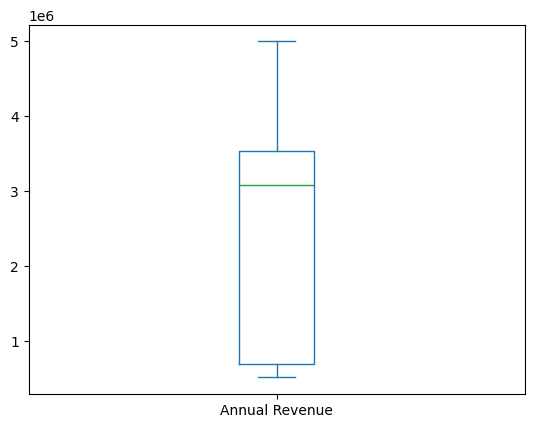

In [17]:
import pandas as pd
from langchain_experimental.agents import create_csv_agent
from langchain.llms import OpenAI

# Initialize the OpenAI model with the desired configuration
llm = OpenAI(temperature=0)

# Correct the column names by stripping extra spaces
# Ensure 'Annual Revenue' column is named correctly without extra spaces
leads_data = pd.read_csv('/workspaces/AI-Automated-Lead-Generation-System/Data/leads_data.csv')
leads_data.columns = leads_data.columns.str.strip()  # Strip any extra spaces from column names

# Filter the data to include only relevant columns and ensure descriptions and revenue are non-null
filtered_df = leads_data.dropna(subset=['Short Description', 'Annual Revenue'])
filtered_df = filtered_df[['Company Name for Emails', 'Short Description', 'Company Size', 'Annual Revenue']]

# Function to summarize descriptions if they are too long
# This is optional and would require a separate summarization step or model
def summarize_description(text):
    # Example of a simple truncation as a placeholder for summarization
    return text if len(text) <= 200 else text[:200] + '...'

# Apply summarization if needed
filtered_df['Short Description'] = filtered_df['Short Description'].apply(summarize_description)

# Process the filtered data in chunks
batch_size = 10  # Adjust batch size as needed
for i in range(0, len(filtered_df), batch_size):
    batch_df = filtered_df.iloc[i:i + batch_size]

    # Save the current batch to a temporary CSV file
    batch_df.to_csv('temp_batch.csv', index=False)
    
    # Create an agent for the current batch
    batch_agent = create_csv_agent(
        llm,
        'temp_batch.csv',  # Use the batch CSV file
        verbose=True,
        allow_dangerous_code=True
    )
    
    # Run the query on the current batch to identify leads likely to benefit from AI-driven marketing solutions
    try:
        response = batch_agent.run("Which leads in this batch are most likely to benefit from AI-driven marketing solutions based on their descriptions, size, and revenue?")
        print(response)
    except Exception as e:
        print(f"Error processing batch {i // batch_size + 1}: {e}")


In [18]:
df = leads_data.copy()

In [19]:
df.head()

,Company Name for Emails,# Employees,Industry,Company City,Keywords,Company Phone,Technologies,Annual Revenue,Short Description,Founded Year,Company Size,Lead_Age,Revenue_Per_Employee
0,GOI International UAE,10,graphic design,Dubai,"oilfield drilling equipment, spares, fire dete...",'+971 4 420 7528,"Cloudflare DNS, CloudFlare Hosting, Google Tag...",1400000.0,Fire Detection & Suppression\nOilfield Equipme...,2009.0,Small,15.0,140000.000000
1,SUNDANCE EVENTS,14,events services,Dubai,"corporate events, incentive trips & destinatio...",'+971 4 457 0336,"Amazon AWS, Mobile Friendly, Google AdSense",2236000.0,SUNDANCE events is a fully integrated event ma...,2005.0,Small,19.0,159714.285714
2,Techsource,13,information technology & services,Dubai,NaN,'+971 4 812 2022,"Mimecast, Outlook, Microsoft Office 365, Micro...",4000000.0,"Offering Hosted Services (IaaS, PaaS and SaaS)...",2013.0,Small,11.0,307692.307692
3,Cactix,20,marketing & advertising,Dubai,"social media, web development, content, inboun...",'+971 4 871 6718,"Cloudflare DNS, Gmail, Google Apps, Amazon AWS...",2000000.0,Cactix is a B2B marketing agency specialized i...,2011.0,Small,13.0,100000.000000
4,Kassab Trans Media,62,marketing & advertising,Dubai,"outdoor advertising, out of home, advertising,...",'+971 4 450 6700,"Gmail, Google Apps, GoDaddy Hosting, Apache",2523000.0,Kassab Trans Media is a leading media services...,2013.0,Medium,11.0,40693.548387


In [20]:
# Print the column names to verify their existence
print(df.columns)


Index(['Company Name for Emails', '# Employees', 'Industry', 'Company City',
       'Keywords', 'Company Phone', 'Technologies', 'Annual Revenue',
       'Short Description', 'Founded Year', 'Company Size', 'Lead_Age',
       'Revenue_Per_Employee'],
      dtype='object')


In [21]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 790.9/790.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.0 MB/s eta 0:00:00


Machine learning model to score and qualify leads based on their likelihood to convert

/usr/local/python/3.12.1/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/usr/local/python/3.12.1/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


           Company Name for Emails  Total_Score  Cluster  Annual Revenue  \
180     BiCE International Limited     0.974819        1       4991000.0   
1049  Ali Yaqoob Trading Co. L.L.C     0.967754        7       5000000.0   
349                    PEPCO GROUP     0.962681        0       5000000.0   
1086  Ali Yaqoob Trading Co. L.L.C     0.962681        6       5000000.0   
658                   Seaman Tours     0.959783        4       5000000.0   
214                       AIMS SAL     0.945109        9       4900000.0   
957        Sawas Kitchen Equipment     0.944565        0       4682000.0   
469    NIT an Ingram Micro Company     0.940036        8       5000000.0   
419      ImageGrafix Software FZCO     0.935870        3       5000000.0   
315              Decolight Trading     0.935870        5       5000000.0   

                                               Keywords  
180   fine dine, fine dine italian, fine dine seafoo...  
1049                                           

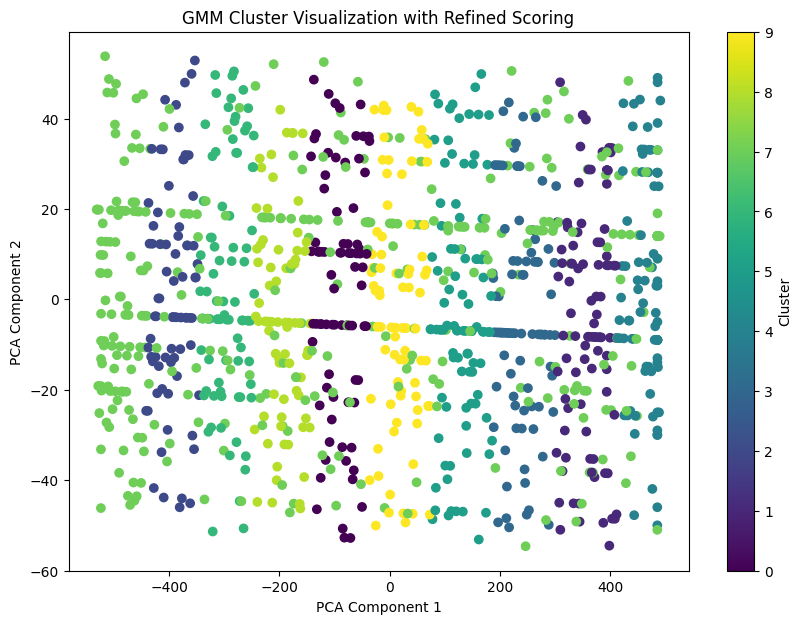

In [22]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sentence_transformers import SentenceTransformer
import numpy as np

df.columns = df.columns.str.strip()
df['Keywords'] = df['Keywords'].fillna('')

# Step 1: Generate Text Embeddings using Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
keywords_embeddings = model.encode(df['Keywords'].tolist())

# Step 2: Process Numerical Features
numerical_features = ['# Employees', ' Annual Revenue ', 'Founded Year', 'Lead_Age', 'Revenue_Per_Employee']
numerical_features = [feature for feature in numerical_features if feature in df.columns]
scaler = StandardScaler()
numerical_data = scaler.fit_transform(df[numerical_features].fillna(0))

# Step 3: Encode Categorical Features
label_encoders = {}
categorical_features = ['Industry', 'Company City', 'Technologies']
encoded_categorical = []

for feature in categorical_features:
    if feature in df.columns:
        le = LabelEncoder()
        encoded = le.fit_transform(df[feature].astype(str))
        encoded_categorical.append(encoded)
        label_encoders[feature] = le

# Combine all features
encoded_categorical = np.array(encoded_categorical).T
all_features = np.hstack([numerical_data, encoded_categorical, keywords_embeddings])

# Step 4: Clustering with Gaussian Mixture Models (GMM)
n_components = 10  # Number of clusters
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
df['Cluster'] = gmm.fit_predict(all_features)

# Step 5: Scoring and Analysis
df['Revenue_Score'] = df['Annual Revenue'].rank(pct=True)
df['Age_Score'] = df['Lead_Age'].rank(pct=True)
df['Total_Score'] = (0.6 * df['Revenue_Score']) + (0.4 * df['Age_Score'])

# Rank by total score and show top leads
top_leads = df.sort_values(by='Total_Score', ascending=False).head(10)
print(top_leads[['Company Name for Emails', 'Total_Score', 'Cluster', 'Annual Revenue', 'Keywords']])

# Visualize the clusters using the first two features
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('GMM Cluster Visualization with Refined Scoring')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
